In [578]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
data=pd.read_excel("C:\\Users\\Utilisateur\\OneDrive\\BILAN_JOURNEE\\BILAN_JOURNEE_mai25.xlsx", index_col='Jour', parse_dates=True)

In [579]:
def choix_features(data):
    df=data.copy()
    df['Somme réseaux']=df['Snap']+df['Insta']+df['Twitter']+df['BeReal']
    df['Jour semaine'] = df.index.strftime('%A')
    
    cols_continues=['Somme réseaux','Lecture']
    
    cols_binaires_ML=["A l'étranger",'Parents',
     'Eugé',
     'Sport',
     'Ciné',
     'Film',
     'Docu',
     'Restau',
     'Fast food',
     'Café/bar solo',
     'Lecture dehors',
     'Café/bar avec copains',
     'Repas copains',
     'Vois copains',
     'Soirée chill',
     'Soirée',
     'Dodo avec Eugé',
    'Messe']
    
    cols_presque_binaires_ML=['Copains','Activité','Transport','Match de sport','Footing']
    
    cols_cat=['Jour semaine','Type']
    
    df=df[cols_cat+cols_binaires_ML+cols_presque_binaires_ML+cols_continues+['Note']]
    return df


#df=df.iloc[0:360,:]


def nettoyage(df):
    jours = {
        'Monday': 'lundi',
        'Tuesday': 'mardi',
        'Wednesday': 'mercredi',
        'Thursday': 'jeudi',
        'Friday': 'vendredi',
        'Saturday': 'samedi',
        'Sunday': 'dimanche'
        }
    df['Jour semaine']=df['Jour semaine'].map(jours)
    df['Copains']=df['Copains'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
    df['Activité']=df['Activité'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
    df['Transport']=df['Transport'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
    df['Match de sport']=df['Match de sport'].map(lambda x: 0 if x==0 else 1)
    df['Footing']=df['Footing'].map(lambda x: 0 if x==0 else 1)
    df["A l'étranger"].fillna('non',inplace=True)
    df["A l'étranger"]=df["A l'étranger"].apply(lambda x: 1 if x == 'oui' else (0 if x == 'non' else np.nan))
    df['Sport']=df['Sport'].map(lambda x:0 if x==0 else 1)
    df['Messe']=df['Messe'].map(lambda x:1 if x==1 else 0)
    df.dropna(inplace=True)
    return df

def nettoyage_predict(df):
    df['Copains']=df['Copains'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
    df['Activité']=df['Activité'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
    df['Transport']=df['Transport'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
    df['Match de sport']=df['Match de sport'].map(lambda x: 0 if x==0 else 1)
    df['Footing']=df['Footing'].map(lambda x: 0 if x==0 else 1)
    df["A l'étranger"]=df["A l'étranger"].apply(lambda x: 1 if x == 'oui' else (0 if x == 'non' else np.nan))
    return df

#df['Travail']=df['Travail'].map(lambda x:0 if pd.isna(x) else x)


df=choix_features(data)
df

,Jour semaine,Type,A l'étranger,Parents,Eugé,Sport,Ciné,Film,Docu,Restau,...,Dodo avec Eugé,Messe,Copains,Activité,Transport,Match de sport,Footing,Somme réseaux,Lecture,Note
Jour,,,,,,,,,,,,,,,,,,,,,
2023-04-12,Wednesday,Cours,NaN,0.00,1.00,0,0.00,0.00,0.00,0.00,...,0.00,NaN,"Elliot, Flo",NaN,NaN,0,0.00,96.00,0.00,6.00
2023-04-13,Thursday,Cours,NaN,0.00,0.00,0,0.00,0.00,0.00,0.00,...,0.00,NaN,"Elliot, Flo",NaN,NaN,0,0.00,125.00,0.00,5.00
2023-04-14,Friday,Cours/Week-end,NaN,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,NaN,Seb,NaN,Train,0,0.00,71.00,0.00,5.50
2023-04-15,Saturday,Week-end,NaN,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,NaN,"Seb, Louis C, Nouhayla, Auriane, Garance",NaN,NaN,0,0.00,107.00,0.00,8.50
2023-04-16,Sunday,Week-end,NaN,0.00,1.00,1,0.00,0.00,0.00,0.00,...,0.00,NaN,"Louis C, Elliot, Flo",NaN,Train,0,8.90,119.00,30.00,8.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-19,Thursday,Mission Sciencéthic,oui,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,NaN,NaN,CCI France à Shanghai,Train,0,0.00,58.00,0.00,7.50
2025-06-20,Friday,Mission Sciencéthic,oui,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,NaN,NaN,NaN,NaN,0,0.00,68.00,4.00,6.00
2025-06-21,Saturday,Week-end,oui,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,NaN,NaN,NaN,NaN,0,0.00,73.00,95.00,7.50


In [580]:
df2=nettoyage(df)
df2

,Jour semaine,Type,A l'étranger,Parents,Eugé,Sport,Ciné,Film,Docu,Restau,...,Dodo avec Eugé,Messe,Copains,Activité,Transport,Match de sport,Footing,Somme réseaux,Lecture,Note
Jour,,,,,,,,,,,,,,,,,,,,,
2023-04-12,mercredi,Cours,0,0.00,1.00,0,0.00,0.00,0.00,0.00,...,0.00,0,1,0,0,0,0,96.00,0.00,6.00
2023-04-13,jeudi,Cours,0,0.00,0.00,0,0.00,0.00,0.00,0.00,...,0.00,0,1,0,0,0,0,125.00,0.00,5.00
2023-04-14,vendredi,Cours/Week-end,0,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,0,1,0,1,0,0,71.00,0.00,5.50
2023-04-15,samedi,Week-end,0,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,0,1,0,0,0,0,107.00,0.00,8.50
2023-04-16,dimanche,Week-end,0,0.00,1.00,1,0.00,0.00,0.00,0.00,...,0.00,0,1,0,1,0,1,119.00,30.00,8.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18,mercredi,Mission Sciencéthic,1,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,0,0,0,0,0,1,39.00,11.00,6.50
2025-06-19,jeudi,Mission Sciencéthic,1,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,0,0,1,1,0,0,58.00,0.00,7.50
2025-06-20,vendredi,Mission Sciencéthic,1,0.00,1.00,0,0.00,0.00,0.00,0.00,...,1.00,0,0,0,0,0,0,68.00,4.00,6.00


In [581]:
df=choix_features(data)
df_ML=nettoyage(df)
X=df_ML.drop('Note',axis=1)
y=df_ML['Note']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [582]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

def lazy_prediction(X,y,fold):
    all_models = []
    
    for train_index, test_index in fold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
        tableau_models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        
        all_models.append(tableau_models)
    resultat_tableau_modeles = pd.concat(all_models).groupby(level=0).mean().sort_values(by="R-Squared", ascending=False)
    return resultat_tableau_modeles

In [583]:
fold = KFold(n_splits=5, shuffle=True, random_state=42)
resultat_tableau_modeles=lazy_prediction(X,y,fold)
resultat_tableau_modeles

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 619, number of used features: 30
[LightGBM] [Info] Start training from score 6.753635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 619, number of used features: 30
[LightGBM] [Info] Start training from score 6.759289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 619, number of used features: 30
[LightGBM] [Info] Start training from score 6.743134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 619, number of used features: 30
[LightGBM] [Info] Start training from score 6.746365
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 620, number of used features: 30
[LightGBM] [Info] Start training from score 6.757258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LarsCV,0.24,0.37,0.82,0.07
LassoLarsCV,0.24,0.37,0.82,0.08
LassoCV,0.24,0.37,0.82,0.10
ElasticNetCV,0.24,0.37,0.82,0.14
LassoLarsIC,0.24,0.37,0.83,0.04
BayesianRidge,0.23,0.36,0.83,0.05
NuSVR,0.22,0.36,0.83,0.06
RidgeCV,0.22,0.35,0.84,0.04
Ridge,0.21,0.35,0.84,0.04


In [584]:
resultat_tableau_modeles

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LarsCV,0.24,0.37,0.82,0.07
LassoLarsCV,0.24,0.37,0.82,0.08
LassoCV,0.24,0.37,0.82,0.10
ElasticNetCV,0.24,0.37,0.82,0.14
LassoLarsIC,0.24,0.37,0.83,0.04
BayesianRidge,0.23,0.36,0.83,0.05
NuSVR,0.22,0.36,0.83,0.06
RidgeCV,0.22,0.35,0.84,0.04
Ridge,0.21,0.35,0.84,0.04


In [585]:
def build_lazy_like_preprocessor(X):
    # Identifier les colonnes catégorielles (comme le ferait pd.get_dummies)
    categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
        ],
        remainder="passthrough"  # conserve les colonnes numériques telles quelles
    )
    
    return preprocessor


preprocessor = build_lazy_like_preprocessor(X)

In [586]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

from sklearn.svm import SVR,NuSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoCV, LassoLarsCV, LarsCV

dict_models = {
    'LarsCV': LarsCV(),
    'BayesianRidge': BayesianRidge(),
    'LinearRegression': LinearRegression(),
    #'LassoCV': LassoCV(),
#'BayesianRidge': BayesianRidge(),
}

In [587]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    
    report = {
        'MAE': mae.round(2),
        'MedAE': medae.round(2),
        'RMSE': rmse.round(2),
        'R²': r2.round(2)
    }

    for metric, value in report.items():
        print(f'{metric}: {value}')

In [588]:
from sklearn.model_selection import learning_curve, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=77)
def evaluation(dict_models,fold):
    for nom,model_du_dict in dict_models.items():
        model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor",model_du_dict)
    ])
        plt.figure()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               train_sizes=np.linspace(0.1, 1, 10), cv=kfold, scoring='r2')
        print(model)
        plt.title(nom)
        plt.plot(N, train_score.mean(axis=1), label='train')
        plt.plot(N, val_score.mean(axis=1), label='validation')
        plt.xlabel('Taille du train set')
        plt.ylabel('Score R²')
        plt.ylim(0,1.01)
        plt.legend()
        plt.show()
        regression_report(y_test,y_pred)
        print()

In [589]:
import plotly.graph_objects as go
from sklearn.model_selection import learning_curve, KFold, cross_val_predict
from sklearn.pipeline import Pipeline
import numpy as np

kfold = KFold(n_splits=5, shuffle=True, random_state=77)

def evaluation(dict_models, fold):
    for nom, model_du_dict in dict_models.items():
        model = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("regressor", model_du_dict)
        ])

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        N, train_score, val_score = learning_curve(
            model, X_train, y_train,
            train_sizes=np.linspace(0.1, 1, 10),
            cv=fold,
            scoring='r2'
        )

        # ⬇️ Création du graphique interactif
        fig = go.Figure()

        fig.add_trace(go.Scatter(
            x=N,
            y=train_score.mean(axis=1),
            mode='lines+markers',
            name='Train',
            line=dict(color='blue')
        ))

        fig.add_trace(go.Scatter(
            x=N,
            y=val_score.mean(axis=1),
            mode='lines+markers',
            name='Validation',
            line=dict(color='orange')
        ))

        fig.update_layout(
            title=nom,
            xaxis_title='Taille du train set',
            yaxis_title='Score R²',
            yaxis=dict(range=[0, 1.01]),
            legend=dict(x=0.01, y=0.99),
            template='plotly_white',
            width=600,    # largeur en pixels
            height=400 
        )

        fig.show()

        # ⬇️ Affichage du rapport de régression
        regression_report(y_test, y_pred)
        print()


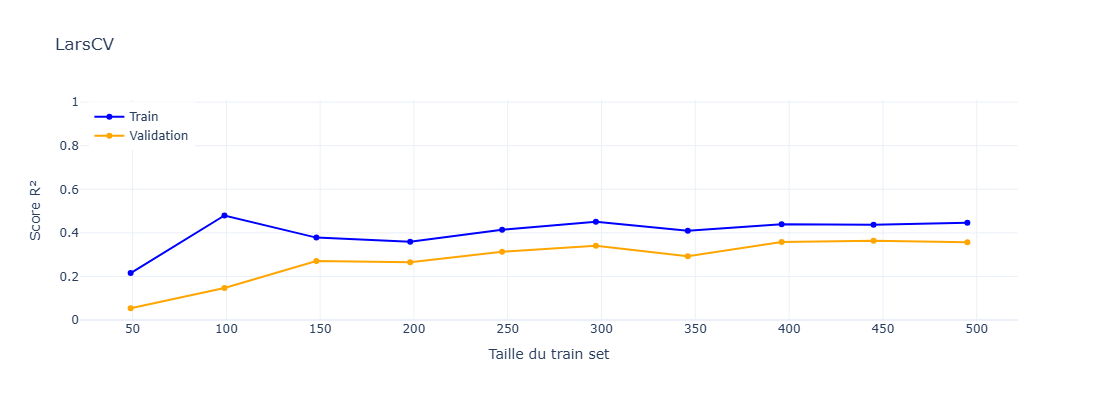

MAE: 161859.38
MedAE: 102406.0
RMSE: 244186.87
R²: -55782258084.13



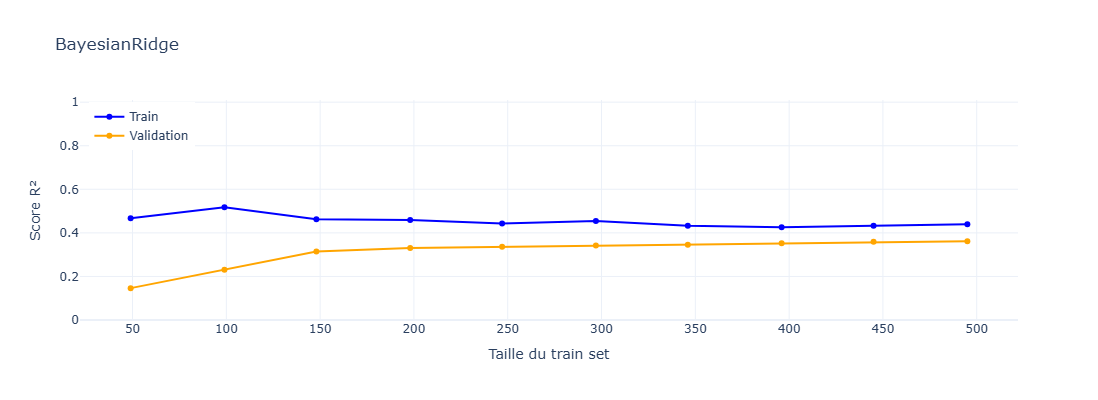

MAE: 0.62
MedAE: 0.51
RMSE: 0.86
R²: 0.3



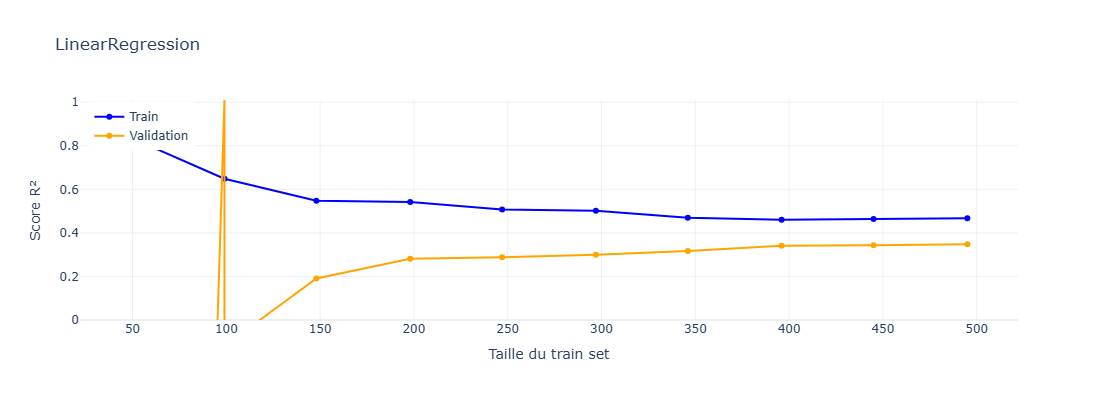

MAE: 0.65
MedAE: 0.53
RMSE: 0.88
R²: 0.27



In [590]:
evaluation(dict_models,kfold)

In [591]:
modele_choisi=LinearRegression()

In [592]:
data_prediction = {
    "Jour semaine": "lundi",
    "Type": "Stage",  
    "A l'étranger": "oui",  
    "Parents": 0,  
    "Eugé": 1,  
    "Sport": 0,
    "Ciné": 0,
    "Film": 0,
    "Docu": 0,
    "Restau": 1,
    "Fast food": 0,
    "Café/bar solo": 0,
    "Lecture dehors": 0,
    "Café/bar avec copains": 0,
    "Repas copains": 0,
    "Vois copains": 0,
    "Soirée chill": 0,
    "Soirée": 0,
    "Dodo avec Eugé": 1,
    "Messe": 0,
    "Copains": "",  
    "Activité": "",  
    "Transport": "",
    "Match de sport": 0,
    "Footing": 0,
    "Somme réseaux": 52,  
    "Lecture": 1, 
}

In [593]:
data_prediction2 = {
    "Jour semaine": "samedi",
    "Type": "Week-end",  
    "A l'étranger": "oui",  
    "Parents": 0,  
    "Eugé": 1,  
    "Sport": 0,
    "Ciné": 0,
    "Film": 0,
    "Docu": 0,
    "Restau": 1,
    "Fast food": 0,
    "Café/bar solo": 0,
    "Lecture dehors": 0,
    "Café/bar avec copains": 0,
    "Repas copains": 0,
    "Vois copains": 0,
    "Soirée chill": 0,
    "Soirée": 1,
    "Dodo avec Eugé": 1,
    "Messe": 0,
    "Copains": "",  
    "Activité": "",  
    "Transport": "",
    "Match de sport": 0,
    "Footing": 0,
    "Somme réseaux": 73,  
    "Lecture": 95, 
}

In [594]:
def nettoyage(df):
    jours = {
        'Monday': 'lundi',
        'Tuesday': 'mardi',
        'Wednesday': 'mercredi',
        'Thursday': 'jeudi',
        'Friday': 'vendredi',
        'Saturday': 'samedi',
        'Sunday': 'dimanche'
        }
    df['Jour semaine']=df['Jour semaine'].map(jours)
    df['Copains']=df['Copains'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
    df['Activité']=df['Activité'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
    df['Transport']=df['Transport'].map(lambda x: 1 if pd.notna(x) and x != '' else 0)
    df['Match de sport']=df['Match de sport'].map(lambda x: 1 if x==0 else 0)
    df['Footing']=df['Footing'].map(lambda x: 1 if x==0 else 0)
    df["A l'étranger"].fillna('non',inplace=True)
    df["A l'étranger"]=df["A l'étranger"].apply(lambda x: 1 if x == 'oui' else (0 if x == 'non' else np.nan))
    df['Sport']=df['Sport'].map(lambda x:0 if x==0 else 1)
    df['Messe']=df['Messe'].map(lambda x:1 if x==1 else 0)
    df.dropna(inplace=True)
    return df

In [603]:
X_predict = pd.DataFrame([data_prediction2])
X_predict=nettoyage_predict(X_predict)
X_predict

,Jour semaine,Type,A l'étranger,Parents,Eugé,Sport,Ciné,Film,Docu,Restau,...,Soirée,Dodo avec Eugé,Messe,Copains,Activité,Transport,Match de sport,Footing,Somme réseaux,Lecture
0,samedi,Week-end,1,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,73,95


In [605]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor",LinearRegression())
    ])


model.fit(X_train,y_train)
model.predict(X_predict)

array([7.88769016])

In [597]:
float(model.predict(X_predict))

7.8876901599494165

In [598]:
for model in models.values():
    model.fit(X_train,y_train)
    plt.figure(figsize=(6,2))
    y_pred = model.predict(X_test)
    err_hist = np.abs(y_test - y_pred)
    plt.hist(err_hist, bins=30)
    plt.xlabel('Erreur absolue')
    plt.ylabel('Fréquence')
    plt.title(f"{model}")
    plt.show()

TypeError: 'numpy.ndarray' object is not callable